NAME: DEV AGARWAL REG NO: 220968019 SECTION: A ROLL NO: 06 BATCH: 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
data = pd.read_csv('mtcars.csv')
df = pd.DataFrame(data)
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


UNDERSTANDING THE DATA

In [4]:
df.shape

(32, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32 non-null     object 
 1   mpg         32 non-null     float64
 2   cyl         32 non-null     int64  
 3   disp        32 non-null     float64
 4   hp          32 non-null     int64  
 5   drat        32 non-null     float64
 6   wt          32 non-null     float64
 7   qsec        32 non-null     float64
 8   vs          32 non-null     int64  
 9   am          32 non-null     int64  
 10  gear        32 non-null     int64  
 11  carb        32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [5]:
df.isnull().sum()

Unnamed: 0    0
mpg           0
cyl           0
disp          0
hp            0
drat          0
wt            0
qsec          0
vs            0
am            0
gear          0
carb          0
dtype: int64

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [10]:
x = df.drop(columns = ['am','Unnamed: 0'])
y = df[['am']]

In [11]:
scaler = MinMaxScaler()
model=scaler.fit(x)
scaled_data=model.transform(x)
 
# print scaled features
print(scaled_data)

[[0.45106383 0.5        0.22175106 0.204947   0.52534562 0.28304781
  0.23333333 0.         0.5        0.42857143]
 [0.45106383 0.5        0.22175106 0.204947   0.52534562 0.34824853
  0.3        0.         0.5        0.42857143]
 [0.52765957 0.         0.0920429  0.14487633 0.50230415 0.20634109
  0.48928571 1.         0.5        0.        ]
 [0.46808511 0.5        0.46620105 0.204947   0.14746544 0.43518282
  0.58809524 1.         0.         0.        ]
 [0.35319149 1.         0.72062859 0.43462898 0.1797235  0.49271286
  0.3        0.         0.         0.14285714]
 [0.32765957 0.5        0.38388626 0.18727915 0.         0.49782664
  0.68095238 1.         0.         0.        ]
 [0.16595745 1.         0.72062859 0.6819788  0.20737327 0.52595244
  0.15952381 0.         0.         0.42857143]
 [0.59574468 0.         0.1885757  0.03533569 0.42857143 0.42879059
  0.6547619  1.         0.5        0.14285714]
 [0.52765957 0.         0.17385882 0.15194346 0.53456221 0.41856303
  1.        

MULTIPLE LINEAR REGRESSION

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [13]:
reg = LinearRegression()

In [14]:
reg.fit(x_train, y_train)

LinearRegression()

In [15]:
y_pred = reg.predict(x_test)

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

ERROR CALCULATION

In [17]:
mse = mean_squared_error(y_test,y_pred)
print("mean squared error: ",mse)
rmse  = math.sqrt(mse)
print("root mean square error: ",rmse)
mae = mean_absolute_error(y_test,y_pred)
print("mean absolute error: ",mae)

mean squared error:  0.0916624235550364
root mean square error:  0.30275802806042384
mean absolute error:  0.24014773418863583


In [18]:
y_pred

array([[ 0.17383   ],
       [ 0.01408047],
       [ 0.10325288],
       [ 0.7586029 ],
       [-0.05476868],
       [-0.39774453],
       [ 0.66635419],
       [ 1.57484512],
       [ 0.46050049],
       [ 0.04741225]])

In [19]:
df.corr()['am']

C:\Users\DELL\AppData\Local\Temp\ipykernel_7864\2557080918.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['am']


mpg     0.599832
cyl    -0.522607
disp   -0.591227
hp     -0.243204
drat    0.712711
wt     -0.692495
qsec   -0.229861
vs      0.168345
am      1.000000
gear    0.794059
carb    0.057534
Name: am, dtype: float64

LINEAR REGRESSION

In [20]:
df1 = df[['gear','am']]

In [21]:
X,Y = train_test_split(df1, test_size = 0.3, random_state = 0)

In [22]:
X_train = X[['gear']]
Y_train = X[['am']]
X_test = Y[['gear']]
Y_test = Y[['am']]

In [23]:
regressor = LinearRegression()

In [24]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [25]:
Y_pred = regressor.predict(X_test)

In [26]:
Y['predicted_am'] = Y_pred

ERROR CALCULATION

In [27]:
MSE = mean_squared_error(Y_test,Y_pred)
print("mean squared error: ",MSE)
RMSE  = math.sqrt(MSE)
print("root mean square error: ",RMSE)
MAE = mean_absolute_error(Y_test,Y_pred)
print("mean absolute error: ",MAE)

mean squared error:  0.05886426592797781
root mean square error:  0.24261959098139171
mean absolute error:  0.1631578947368421


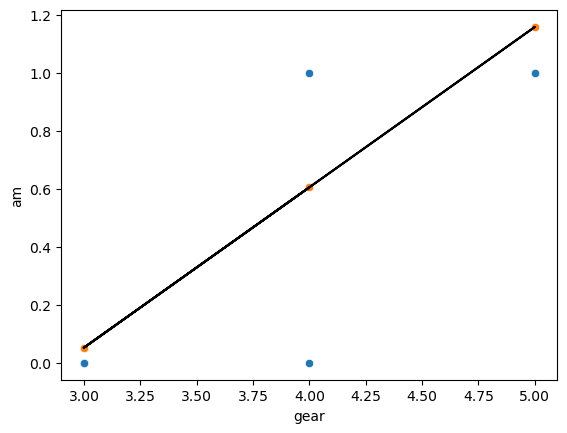

In [28]:
sns.scatterplot(x = 'gear',y = 'am', data = Y)
sns.scatterplot(x = 'gear',y = 'predicted_am', data = Y)
plt.plot(Y['gear'], Y['predicted_am'], color = 'black')
plt.show()